In [ ]:
# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [23]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [24]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 

#### Question 2. Create a summary table

In [22]:
#function
df_raw.describe()

C:\Users\Amber\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning:

Invalid value encountered in percentile



,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: <br/>
No reason with artificial data.... <br/>
I mean: larger? The standard deviaiton is a larger _number_ but that does not indicate anything <br/>


#### Question 4. Drop data points with missing data


In [5]:
df = df_raw.dropna()
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: 

#### Question 6. Create box plots for GRE and GPA

In [7]:
!pip install plotly

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [16]:
import plotly 
plotly.tools.set_credentials_file(username='akell47', api_key='vk5wgdfotc')

py.sign_in("akell47", "vk5wgdfotc")

In [45]:
data = [
    go.Box(
        x= df.gre,
        name = 'GRE',
        boxpoints='all',
        jitter=0.5,
        pointpos=0,
        marker = dict(
            color = 'rgb(199, 21, 133)',
        )
    )
]
py.iplot(data)

In [54]:
data = [
    go.Box(
        x= df.gpa,
        name = 'GPA',
        boxpoints='all',
        jitter=0.5,
        pointpos=0,
        marker = dict(
            color = 'rgb(50, 30, 112)',
        )
    )
]
py.iplot(data)

In [ ]:
#boxplot 2 

#### Question 7. What do this plots show?

Answer: 

#### Question 8. Describe each distribution 

In [ ]:
# plot the distribution of each variable 


#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: 

#### Question 11. Which of our variables are potentially colinear? 

In [ ]:
# create a correlation matrix for the data


#### Question 12. What did you find?

Answer: 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

#### Question 14. What is your hypothesis? 

Answer: 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [70]:
print "GRE null indicies",np.where(df_raw['gre'].isnull())[0]
print "GPA null indicies", np.where(df_raw['gpa'].isnull())[0]

GRE null indicies [187 212]
GPA null indicies [187 236]


In [71]:
print df_raw[df_raw.index == 187]
print df_raw[df_raw.index == 212]
print df_raw[df_raw.index == 236]

     admit  gre  gpa  prestige
187      0  NaN  NaN       2.0
     admit  gre   gpa  prestige
212      0  NaN  2.87       2.0
     admit    gre  gpa  prestige
236      1  660.0  NaN       NaN


In [76]:
print df_raw.loc[212]
print df_raw.loc[187]
print df_raw.loc[236]

admit       0.00
gre          NaN
gpa         2.87
prestige    2.00
Name: 212, dtype: float64
admit       0.0
gre         NaN
gpa         NaN
prestige    2.0
Name: 187, dtype: float64
admit         1.0
gre         660.0
gpa           NaN
prestige      NaN
Name: 236, dtype: float64


In [65]:
np.where(df_raw['prestige'].isnull())[0]

array([236], dtype=int64)

Could possibly fill in the missing data. Could fill in the missing values with the mean of that column.  Would be best however to just preform the calculations so that it ignores that particular value.  Maybe there is a case where a student didn't actually have a GRE score. Maybe that student was still accepted.  Unlikely, but could be possible. **IF** that is the case then that is something of significance that should not be altered with. 

**Notice** Above there is a incidence where presige and gpa is null yet this hypothtical person was still admitted!<br/>

In order to handle the missing data, have to first determine the possible reasons why it might be missing. If data is missing at random, then the data can approximated and "filed-in" by assuming the model formed by the regression model of the variables.  Futher care should also be taken in consulting other similar studies and contextual cultural assumptions before automatically filling in the missing data. <br/>

Simply removing the null values by method of removing the entire row, or column even is the least recommended method for this throws away data.  This can also increase error by reducing the quantity of records and may introduce bias. 

#### 2. Bonus: Log transform the skewed data

In [10]:
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [12]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


In [39]:
a = df.groupby("prestige").size()
print a

prestige
1.0     61
2.0    148
3.0    121
4.0     67
dtype: int64


In [46]:
# df.groupby(["prestige","admit"]).size() 
b = df.groupby(["prestige", "admit"]).size()
print b
b.dtypes

prestige  admit
1.0       0        28
          1        33
2.0       0        95
          1        53
3.0       0        93
          1        28
4.0       0        55
          1        12
dtype: int64


dtype('int64')

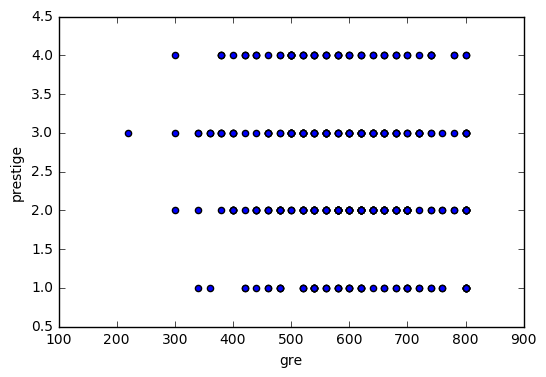

In [53]:
df.plot.scatter(x = 'gre', y = 'prestige')
# df.plot.scatter(x = 'prestige', y = 'gre')

#### 3. Advanced: Impute missing data